In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

In [3]:
payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": "device=desktop&navsource=home&navsource=home&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m"
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
}]

In [4]:
req = requests.post(url, json=payload).json()
rows = req[0]['data']['ace_search_product_v4']['data']['products']
print(len(rows))

60


In [5]:
print(req)

[{'data': {'ace_search_product_v4': {'header': {'totalData': 13808618, 'totalDataText': '13.5jt+', 'processTime': 0.287577265, 'responseCode': 6, 'errorMessage': '', 'additionalParams': 'rf=true&nuq=ac', 'keywordProcess': '7', 'componentId': '02.01.00.00', '__typename': 'AceSearchUnifyHeader'}, 'data': {'banner': {'position': 0, 'text': '', 'imageUrl': '', 'url': '', 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyBanner'}, 'backendFilters': '', 'isQuerySafe': True, 'ticker': {'text': '', 'query': '', 'typeId': 0, 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyTicker'}, 'redirection': {'redirectUrl': '', 'departmentId': 0, '__typename': 'AceSearchUnifyRedirection'}, 'related': {'position': 0, 'trackingOption': 0, 'relatedKeyword': 'ac', 'otherRelated': [], '__typename': 'AceSearchUnifyRelated'}, 'suggestion': {'currentKeyword': '{}', 'suggestion': 'ac', 'suggestionCount': 13832333, 'instead': '', 'insteadCount': 0, 'query': '', 'text': 'Tidak 

In [6]:
for i in range(0, len(rows)):
    no = i
    nama_produk = rows[i]['name']
    harga = rows[i]['price']
    rating = rows[i]['ratingAverage']
    toko = rows[i]['shop']['name']
    lokasi = rows[i]['shop']['city']
    tjl = rows[i]['labelGroups']
    terjual = ''
    for i in tjl:
        if tjl[0]['position'] == 'costperunit':
            terjual = ''
        elif tjl[0]['title'] == 'PreOrder':
            terjual = ''
        elif tjl[0]['title'] == 'Grosir':
            terjual = ''
        elif tjl[0]['title'] == 'Produk Terbaru':
            terjual = ''
        elif tjl[0]['title'] =='Cashback':
            terjual = ''
        else:
            terjual = tjl[0]['title']
    #terjual = next((rows[i]['labelGroups'][0]['title'] for item in rows[i]['labelGroups'][0] if rows[i]['labelGroups'][0]['position'] == 'integrity'), None)
    print(no, nama_produk, harga, rating, toko, lokasi, terjual)

0 GREE GWC-09MOO5-S AC 1PK Split Standart Auto Clean 1 PK GWC09MOO5S Rp3.619.000 5.0 Permata Elektronik Jakarta Pusat Cashback 3%
1 AC SHARP AH-A 09 SAY 1 PK + PASANG R32 STANDARD THAILAND 09SAY Rp3.099.000 4.8 Starlyn Elektronik Jakarta Barat Cashback 3%
2 AC Daikin Standard Thailand 2 PK Type FTC50NV14 Rp7.299.000 5.0 PT SSM Jakarta Selatan Sisa 8
3 New !! GREE AC Split 1/2 PK GWC-05MOO5-S AC Split 0.5 PK GWC-05MOO5S Rp3.039.000 4.9 Sajun Electronic Jakarta Utara Cashback 3%
4 Gree AC Standard 1/2 pk GWC-05MOO5 Unit Only - 05 MOO5 GARANSI RESMI Rp3.039.000 5.0 89 elektronik Jakarta Barat Cashback 3%
5 PANASONIC YN09WKJ AC SPLIT 1PK STANDARD R32 Unit Only YN09 WKJ Rp3.594.333 4.9 Delta Electronics Tangerang Sisa 3
6 Plastik Cuci AC Besar 1/2 - 2 PK Rp32.000 4.9 Pacific Plastik Inti - JKT Jakarta Barat Terlaris
7 GREE GWC-18MOO5-S AC 2PK Split Standart Auto Clean 2 PK GWC18MOO5S Rp6.439.000 5.0 Permata Elektronik Jakarta Pusat Cashback 3%
8 AC DAIKIN FTC15NV14 - Standard Thailand 1/2 P

In [7]:
len(terjual)

11

In [9]:
search = 'fungisida chlorothalonil'
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

def get_param():
    params = []
    for i in range(1,27):
        param = "device=desktop&navsource=home&navsource=home&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m".format(i, search, (i-1)*60)
        params.append(param)

    return params

def scraped(param):
    payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": param
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
    }]

    req = requests.post(url, json=payload).json()
    rows = req[0]['data']['ace_search_product_v4']['data']['products']
    #print(len(rows))
    scraped = []
    for i in range(0, len(rows)):
        no = i
        toko = rows[i]['shop']['name']
        lokasi = rows[i]['shop']['city']
        nama_produk = rows[i]['name']
        harga = rows[i]['price']
        rating = rows[i]['ratingAverage']
        tjl = rows[i]['labelGroups']
        terjual = ''
        for i in tjl:
            if tjl[0]['position'] == 'costperunit':
                terjual = ''
            elif tjl[0]['title'] == 'PreOrder':
                terjual = ''
            elif tjl[0]['title'] == 'Grosir':
                terjual = ''
            elif tjl[0]['title'] == 'Produk Terbaru':
                terjual = ''
            elif tjl[0]['title'] =='Cashback':
                terjual = ''
            else:
                terjual = tjl[0]['title']
        scraped.append((
            nama_produk, harga, rating, toko, lokasi, terjual
        ))
    return scraped

if __name__ == '__main__':
    params = get_param()
    all_data = []
    for i in range(0, len(params)):
        param = params[i]
        data = scraped(param)
        all_data.extend(data)
    #print(all_data)
    df_chlorothalonil = pd.DataFrame(all_data, columns=['Nama Produk', 'Harga', 'Rating', 'Toko', 'Lokasi', 'Terjual'])

In [ ]:
#params_all = "device=desktop&navsource=home&navsource=home&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m".format(page, start)

In [10]:
df_chlorothalonil

,Nama Produk,Harga,Rating,Toko,Lokasi,Terjual
0,is chlorothalonil 75 % wp - fungisida protekti...,Rp132.000,,Appa garden,Jakarta Barat,
1,TERBARU FUNGISIDA KELONIL 75 WP 500 GRAM (CHLO...,Rp83.000,,bsd ark,Bekasi,
2,fungisida TAGOLING 75% WP 400 GRAM chlorothalo...,Rp162.000,,fr234,Jakarta Selatan,
3,JUAL FUNGISIDA KELONIL 75 WP 500 GRAM (CHLOROT...,Rp86.000,,masri djaya,Serang,
4,FUNGISIDA KELONIL 75 WP 500 GRAM (CHLOROTHALON...,Rp84.000,,SUNIWE,Kab. Semarang,
5,Terlaris Fungisida Kelonil 75 Wp 500 Gram (Chl...,Rp71.000,,fajarofficial30,Kab. Bandung,
6,FUNGISIDA KELONIL 75 WP 500 GRAM (CHLOROTHALON...,Rp78.000,,ConvenienceStore7,Jakarta Barat,
7,Fungisida Kelonil 75 Wp 500 Gram (Chlorothalon...,Rp131.000,,SNOW WHITE SKIN CARE SHOP,Jakarta Barat,
8,Fungisida Kelonil 75 Wp 500 Gram (Chlorothalon...,Rp121.000,,FafziStore,Surabaya,
9,FUNGISIDA KELONIL 75 WP 500 GRAM (CHLOROTHALON...,Rp85.000,,Rumah Taniku,Bogor,


In [11]:
df_chlorothalonil['Terjual'].unique()

array(['', 'Cashback 2%', 'Terjual 1', 'Cashback 10 rb', 'Cashback 5 rb',
       'Diskon 3%'], dtype=object)

In [12]:
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 1', 'Terjual_num1'] = '1'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 2', 'Terjual_num1'] = '2'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 3', 'Terjual_num1'] = '3'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 4', 'Terjual_num1'] = '4'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 5', 'Terjual_num1'] = '5'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 6', 'Terjual_num1'] = '6'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 7', 'Terjual_num1'] = '7'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 8', 'Terjual_num1'] = '8'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 9', 'Terjual_num1'] = '9'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 10', 'Terjual_num1'] = '10'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 11', 'Terjual_num1'] = '11'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 12', 'Terjual_num1'] = '12'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 13', 'Terjual_num1'] = '13'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 15', 'Terjual_num1'] = '15'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 16', 'Terjual_num1'] = '16'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 18', 'Terjual_num1'] = '18'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 19', 'Terjual_num1'] = '19'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 20', 'Terjual_num1'] = '20'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 21', 'Terjual_num1'] = '21'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 22', 'Terjual_num1'] = '22'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 24', 'Terjual_num1'] = '24'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 25', 'Terjual_num1'] = '25'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 28', 'Terjual_num1'] = '28'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 30+', 'Terjual_num1'] = '30'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 50+', 'Terjual_num1'] = '50'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 60+', 'Terjual_num1'] = '60'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 80+', 'Terjual_num1'] = '80'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 250+', 'Terjual_num1'] = '250'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 500+', 'Terjual_num1'] = '500'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 750+', 'Terjual_num1'] = '750'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 1 rb+', 'Terjual_num1'] = '1000'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 3 rb+', 'Terjual_num1'] = '3000'
df_chlorothalonil.loc[df_chlorothalonil['Terjual'] == 'Terjual 4 rb+', 'Terjual_num1'] = '4000'

In [13]:
df_chlorothalonil['Terjual_num1'] = df_chlorothalonil['Terjual_num1'].astype(float)

In [14]:
df_chlorothalonil['Rating'] = df_chlorothalonil['Rating'].replace('', np.nan, regex=True)
df_chlorothalonil['Rating'] = df_chlorothalonil['Rating'].astype(float)

In [15]:
df_chlorothalonil['Harga'] = df_chlorothalonil['Harga'].str.replace(r'\D', '')

C:\Users\i_fes\AppData\Local\Temp\ipykernel_12764\2641590348.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_chlorothalonil['Harga'] = df_chlorothalonil['Harga'].str.replace(r'\D', '')


In [16]:
df_chlorothalonil['Harga'] = df_chlorothalonil['Harga'].astype(float)

In [17]:
df_chlorothalonil.dtypes

Nama Produk      object
Harga           float64
Rating          float64
Toko             object
Lokasi           object
Terjual          object
Terjual_num1    float64
dtype: object

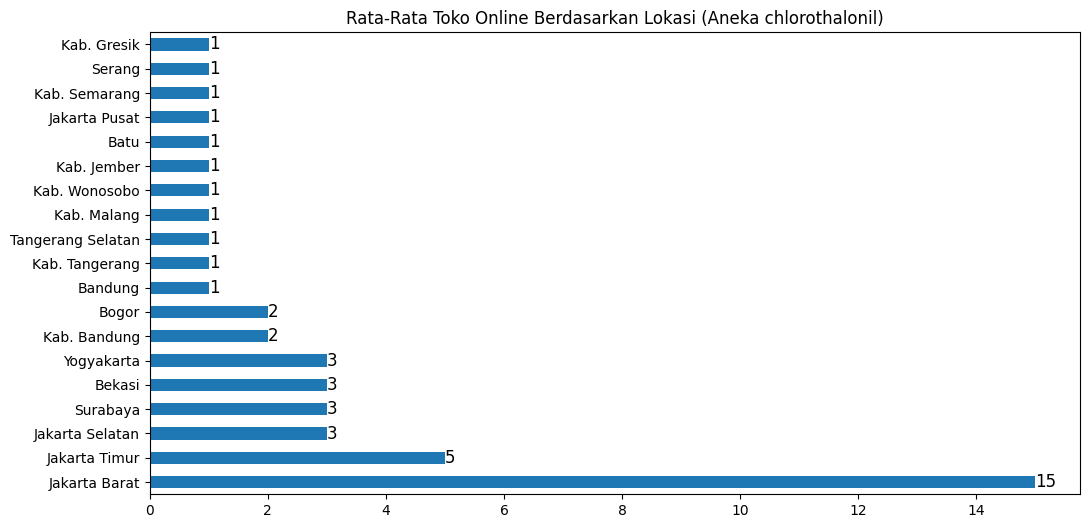

In [18]:
ax = df_chlorothalonil['Lokasi'].value_counts() \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Toko Online Berdasarkan Lokasi (Aneka chlorothalonil)')

plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize = 12)

plt.show()

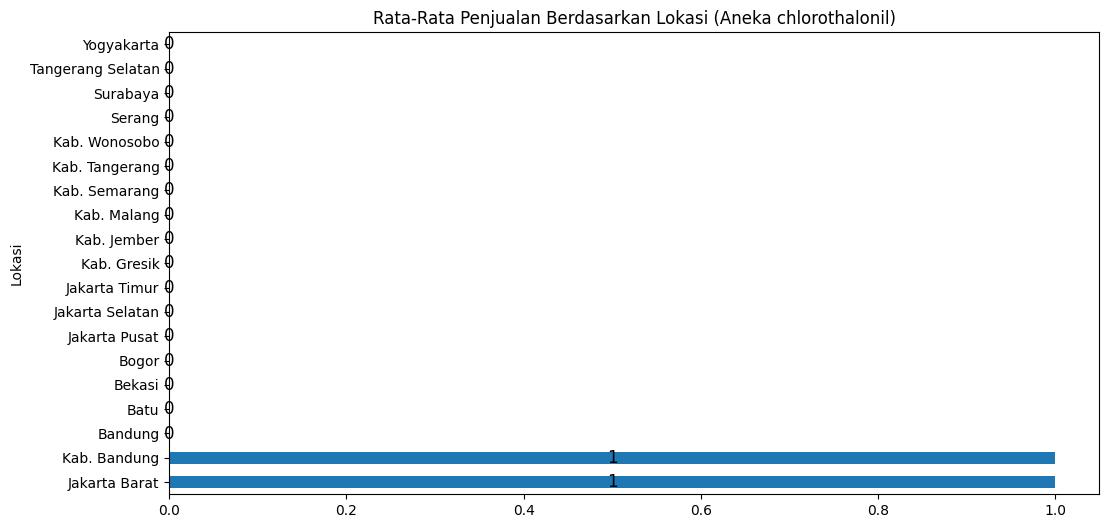

In [19]:
ax = df_chlorothalonil.groupby('Lokasi')['Terjual_num1'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Penjualan Berdasarkan Lokasi (Aneka chlorothalonil)')
ax.bar_label(ax.containers[0], label_type = 'center', fmt = '%d', fontsize=12)
plt.show()

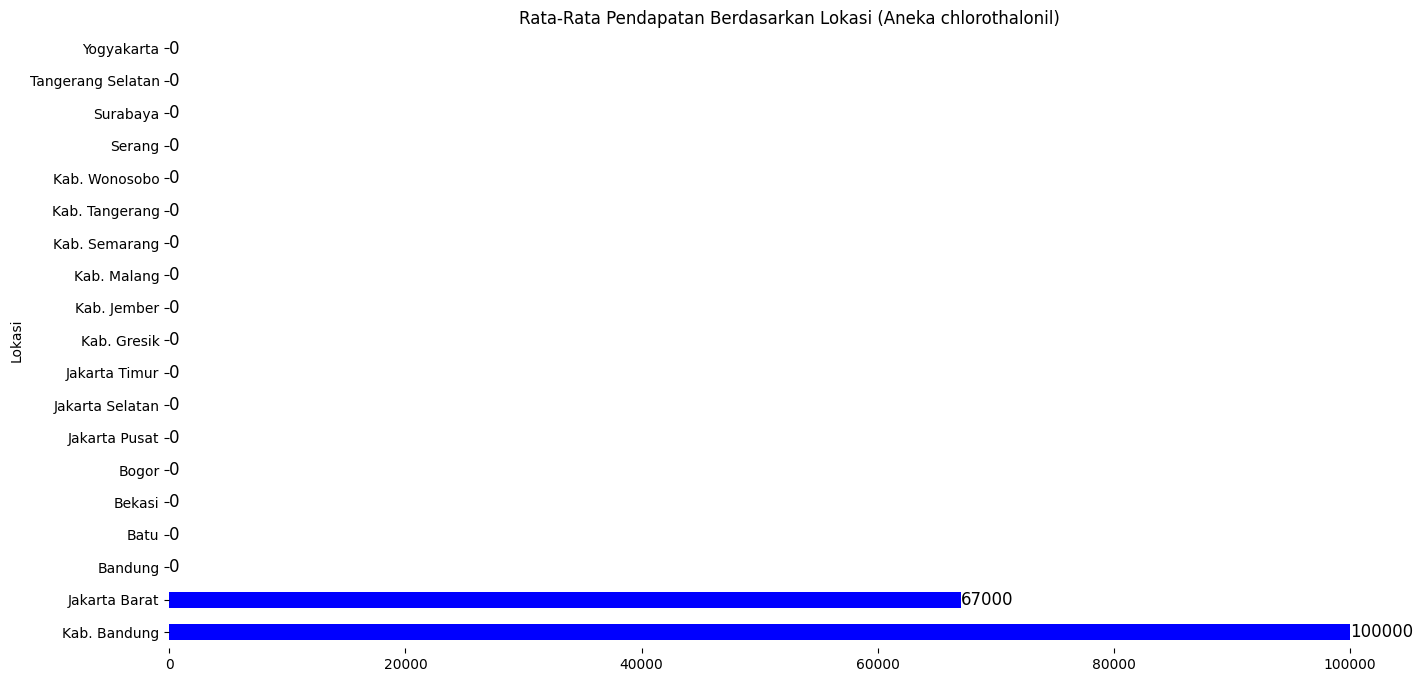

In [20]:
df_chlorothalonil['Pendapatan'] = df_chlorothalonil['Terjual_num1']*df_chlorothalonil['Harga']
my_colors = list('bbgbb')

ax = df_chlorothalonil.groupby('Lokasi')['Pendapatan'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (16,8), title='Rata-Rata Pendapatan Berdasarkan Lokasi (Aneka chlorothalonil)', color=my_colors)
plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize=12)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

#rects = ax.patches

#labels = [f"label{i}" for i in range(len(rects))]


#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(
#        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
#    )

plt.show()

C:\Users\i_fes\AppData\Local\Temp\ipykernel_12764\3465882803.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_chlorothalonil.dropna().corr()
d:\PROGRAM\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\PROGRAM\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

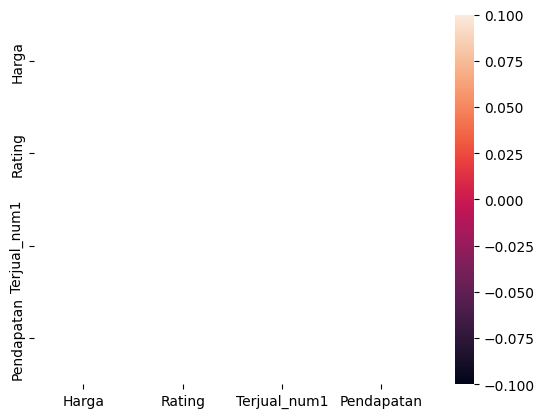

In [21]:
df_corr = df_chlorothalonil.dropna().corr()
sns.heatmap(df_corr, annot = True)

In [ ]:
#df_chlorothalonil.to_excel('Tokped_Daging_API.xlsx', index=False)